#**Load data**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')


#**data preparation**



```
# This is formatted as code
```

##data sepration to x and y

In [ ]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
x = df.drop('logS',axis=1)
x


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


##**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)


In [ ]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


#**Modle Building**




##**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

##**Applying modle to make prediction**

In [ ]:
y_lr_train_prad = lr.predict(x_train)
y_lr_test_prad = lr.predict(x_test)
y_lr_train_prad,y_lr_test_prad

**Evaluate modle performance**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_prad)
lr_train_r2 = r2_score(y_train,y_lr_train_prad)

lr_test_mse = mean_squared_error(y_test,y_lr_test_prad)
lr_test_r2 = r2_score(y_test,y_lr_test_prad)



In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Methods','Training MSE','Training R2','Testing MSE','Testing R2']
lr_results

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training the modle**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the modle to make prediction**



In [ ]:
y_rf_train_prad = rf.predict(x_train)
y_rf_test_prad = rf.predict(x_test)


### **Evaluate modle performance**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_prad)
rf_train_r2 = r2_score(y_train,y_rf_train_prad)

rf_test_mse = mean_squared_error(y_test,y_rf_test_prad)
rf_test_r2 = r2_score(y_test,y_rf_test_prad)

In [ ]:
rf_results = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Methods','Training MSE','Training R2','Testing MSE','Testing R2']
lr_results

## **Modle Comprassion**

In [ ]:
df_model = pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
df_model

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data visulation of prediction results**

## **RANDOM FOREST**

Text(0.5, 0, 'Experimental LogS')

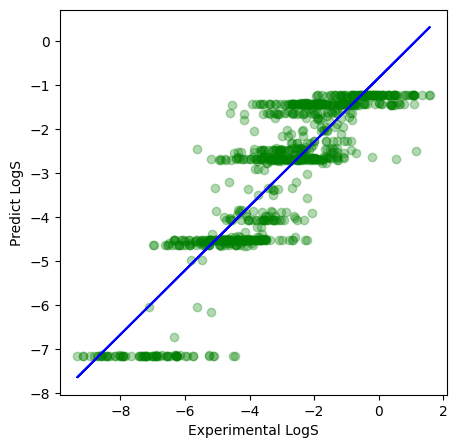

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_rf_train_prad,c="green",alpha=0.3)

z = np.polyfit(y_train, y_rf_train_prad, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),'blue')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

##**LINEAR REGRESSION**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_prad,c="magenta",alpha=0.3)

z = np.polyfit(y_train, y_lr_train_prad, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),'red')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')